In [1]:
# Assignment 2, Problem 5
# Gradient Method (GM)
# U. Kamilov, Z. Zou
# Computational Imaging Group (CIG), WashU

# Import useful libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = sio.loadmat('dataset.mat')

In [3]:
# Access data in the dataset
A, b = data['A'], data['b']
p, n = A.shape

In [4]:
# Define the function and the gradient
def evaluateFunc(x):
    return (1/n) * np.sum(np.log(1 + np.exp(-b * (A.T @ x))))

def evaluateGrad(x):
    return (1/n) * A @ (-b * np.exp(-b * (A.T @ x)) / (1 + np.exp(-b * (A.T @ x))))

In [5]:
# Parameters of the gradient method
xInit = np.zeros((p, 1)) # zero initialization
stepSize = 0.1 # step-size of the gradient method
tol = 1e-6 # stopping tolerance
maxIter = 100 # maximum number of iterations

In [6]:
# Initialize
x = xInit
objVals = np.zeros((maxIter, 1)) # keep track of cost function values

In [7]:
for iter in range(maxIter):
    # gradient at w
    grad = evaluateGrad(x)

    # update
    xNext = x - stepSize * grad

    # evaluate the objective
    funcNext = evaluateFunc(xNext)

    # store the objective and the classification error
    objVals[iter] = funcNext
    
    # print('[%d/%d] [step: %.1e] [objective: %.4e]' % (iter, maxIter, stepSize, objVals[iter]))
    
    # check stopping criterion
    if np.linalg.norm(grad) < tol:
        break
    
    # update x
    x = xNext

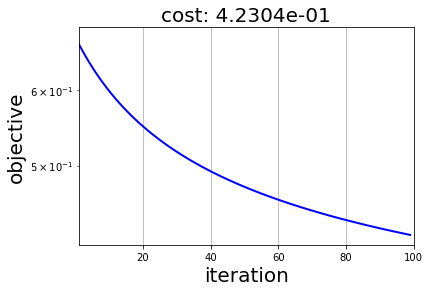

In [8]:
# Visualize the result
plt.semilogy(np.arange(maxIter), objVals, 'b-', linewidth=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('iteration', fontsize = 20)
plt.ylabel('objective', fontsize = 20)
plt.title('cost: %.4e' % objVals[-1], fontsize = 20)
plt.xlim([1, maxIter])
plt.draw()
plt.show()